# Assignment 8 - Was T-Rex a giant chicken?

## Proteomics

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

    
import pandas as pd
import numpy as np

import Assignment8_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

**Exercise 1**: Spectrum graph construction

We represent the masses in a spectrum as a sequence Spectrum of integers in increasing order. We define a labeled graph Graph(Spectrum) by forming a node for each element of ``spectrum``, then connecting nodes $s_i$ and $s_j$ by a directed edge labeled by an amino acid $a$ if $s_j−s_i$ is equal to the mass of $a$. We do not distinguish between amino acids having the same integer masses (i.e., the pairs K/Q and I/L). You'll need to add in a zero mass node at the beginning and the sum of all the masses as the last element.

Input: A list of integers ``spectrum``.

Output: A networkx graph that represents the graph described above.

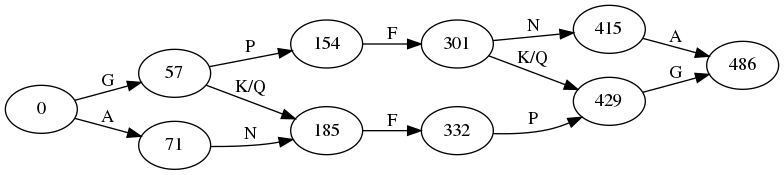

In [2]:
spectrum1 = [57,71,154,185,301,332,415,429,486]
graph1 = Assignment8_helper.spectrum_graph_construction(spectrum1)

Assignment8_helper.show(graph1)

**Exercise 2**: Ideal spectrum

Input: A ``peptide``

Output: A list that represents the masses of the ideal spectrum

In [3]:
peptide1 = "GPG"
spectrum2 = Assignment8_helper.ideal_spectrum(peptide1)
fragments = []
spectrum3 = Assignment8_helper.ideal_spectrum("REDCA",fragments=fragments)

print(f"Spectrum for {peptide1}")
print(spectrum2)
print(f"Fragments for REDCA")
print(fragments)
print(f"Spectrum for REDCA")
print(spectrum3)

Spectrum for GPG
[0, 57, 57, 154, 154, 211]
Fragments for REDCA
['R', 'RE', 'RED', 'REDC', 'REDCA', 'EDCA', 'DCA', 'CA', 'A']
Spectrum for REDCA
[0, 71, 156, 174, 285, 289, 400, 418, 503, 574]


**Exercise 3**: Decoding the ideal spectrum

Input: A ``spectrum``

Output: All matching strings representing the peptide that corresponds to a path from *source* to *sink* in Graph(spectrum) whose ideal spectrum is equal to ``spectrum``.

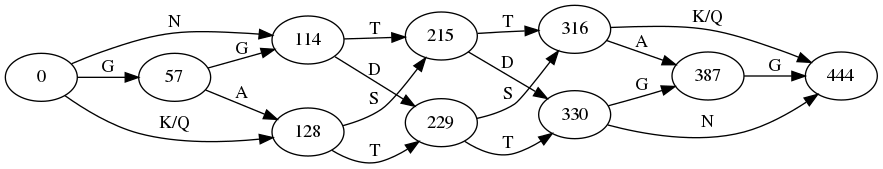

['GGTTK', 'GGTTQ', 'GGDSK', 'GGDSQ', 'GASDN', 'GATTN', 'NTTAG', 'NDSAG', 'KSDGG', 'QSDGG', 'KTTGG', 'QTTGG']


In [4]:
import numpy as np

spectrum5 = [57,114,128,215,229,316,330,387,444]
peptides5 = Assignment8_helper.decoding_ideal_spectrum(spectrum5)

print(peptides5)

## From Ideal to Real Spectra

**Exercise 4**: Convert a peptide into a binary peptide vector.

Input: A peptide P.

Output: The peptide vector of P as a numpy array.

In [5]:
import numpy as np

peptide_v1 = Assignment8_helper.construct_peptide_vector("XZZXX")

print(peptide_v1)
display(Assignment8_helper.construct_peptide_vector("XZZXX",verbose=True))

[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1]


         0
         0
         0
X        1
         0
         0
         0
         0
XZ       1
         0
         0
         0
         0
XZZ      1
         0
         0
         0
XZZX     1
         0
         0
         0
XZZXX    1
dtype: int64

**Exercise 5**: Convert a binary vector into a peptide (do the reverse).

Input: A numpy binary vector ``p``.

Output: A peptide whose binary peptide vector matches ``p``. For masses with more than one amino acid, any choice may be used.

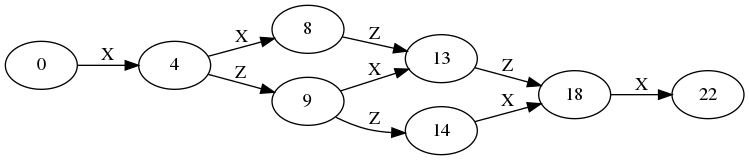

['XXZZX', 'XZZXX']

In [6]:
p = np.array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])
peptides6 = Assignment8_helper.construct_peptide_from_vector(p)

peptides6

**Exercise 6:** Peptide Sequencing Problem

Input: A spectral vector ``s``.

Output: A peptide with maximum score against ``s``. For masses with more than one amino acid, any choice may be used.

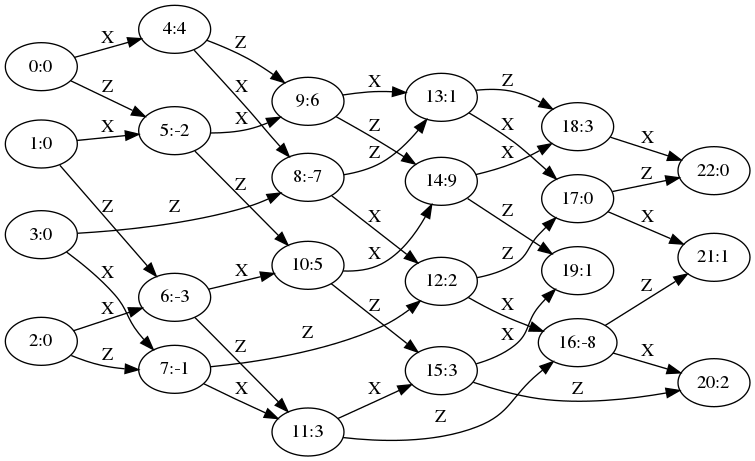

'XZZXX'

In [7]:
p2 = [0,0,0,4,-2,-3,-1,-7,6,5,3,2,1,9,3,-8,0,3,1,2,1,0]
peptide7 = Assignment8_helper.max_peptide(p2,debug=True)

peptide7

In [8]:
# Don't forget to push!